<a id='top'></a>
## Project Title: Automobile Data Analysis And Application


## Contents

1. <a href=#intro>Introduction</a>
    1. <a href=#businessproblems>Business Problems</a>
    1. <a href=#projecttarget>Project Deliverables</a>
1. <a href=#datapre>Data Preprocessing</a>
    1. <a href=#dataoverview>Automobile Data Overview</a>
    1. <a href=#outliers>Outliers Handling</a>
    1. <a href=#splitandtest>Split To Train And Test</a>
    1. <a href=#normalize>Data Normalization</a>
1. <a href=#trainandtest>Data Training and Testing</a>
    1. <a href=#linear>Linear Regression Model</a>
    1. <a href=#ridege>Ridege Regression Model</a>
    1. <a href=#knn>KNN Regression Model</a>
    1. <a href=#decision>Decision Tree Regression Model</a>
    1. <a href=#rfr>Random Forest Regression Model</a>
    1. <a href=#neural>Neural Network Regression Model</a>
1. <a href=#predict>Data Prediction Improvement</a>
    1. <a href=#pre>Data Prediction with Random Forest Model</a>
    1. <a href=#pre1>Data Prediction with Neural Network Model</a>
1. <a href=#con>Conclusion</a>

<a id='intro'></a>
## 1. Introduction
<a href=#top>(back to top)</a>

<a id='businessproblems'></a>
### Business Problems

Before buying a car, customer need to consider many features and factors such as price, horse power, transmission type and etc., sometimes it is quite difficult to make a decision between the performance and the price . 

Data source: https://www.kaggle.com/CooperUnion/cardataset

<a id='projecttarget'></a>
### Project Delivertbles
1, Automobile data visualization and correlation analysis\
2, Clustering models to divide the automobile into several types based on the cost performance\
3, Regression models to predict the car price according to the given parameters\
4, User interface design to recommend best cars for customers of their preference

<a id='datapre'></a>
## 2. Data Preprocessing
<a href=#top>(back to top)</a>

In [2]:
import numpy as np
import pandas as pd
from numpy import inf
from numpy import zeros

import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import seaborn as sns
from time import time

#from matplotlib.pyplot import MultipleLocator
#from numpy.linalg import eig

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn import set_config

from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
# For Regression Algorithm Library Based On Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# For Model Evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# For Splitting Data In Training And Testing
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.model_selection import GridSearchCV


<a id='dataoverview'></a>
### Automobile Data Overview

Read data from csv file.

In [27]:
# Reading data from csv file
auto_data = pd.read_csv('../Team Project/Datasets/automobile data.csv', decimal = ',')

In [8]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [9]:
#Data shape (rows, columns)
auto_data.shape

(11914, 16)

In [10]:
#The first 3 rows of dataset
auto_data.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
10582,Chevrolet,Tracker,2002,regular unleaded,155.0,6.0,AUTOMATIC,rear wheel drive,4.0,NaN,Compact,4dr SUV,19,17,1385,20835
9461,Chevrolet,Silverado 1500 Classic,2007,regular unleaded,295.0,8.0,AUTOMATIC,four wheel drive,4.0,NaN,Large,Extended Cab Pickup,18,13,1385,33135
3120,Honda,Crosstour,2015,regular unleaded,278.0,6.0,AUTOMATIC,front wheel drive,4.0,"Crossover,Hatchback",Midsize,4dr Hatchback,30,20,2202,35940
4041,Suzuki,Equator,2010,regular unleaded,152.0,4.0,MANUAL,rear wheel drive,4.0,NaN,Compact,Extended Cab Pickup,23,19,481,18825
4351,Ford,Explorer Sport Trac,2008,regular unleaded,292.0,8.0,AUTOMATIC,rear wheel drive,4.0,NaN,Compact,Crew Cab Pickup,20,13,5657,28800


In [11]:
#auto_data.drop_duplicates(inplace=True)

First, we drop those columns that have fewer than 10000 non-missing values, the column of "Makket Category"

In [30]:
auto_data = auto_data.drop(labels = ['Market Category'], axis = 1)

Replace unkown values in column 'Transmission Type' with most frequent values.

In [13]:
auto_data.groupby('Transmission Type')['Engine HP'].mean()

Transmission Type
AUTOMATED_MANUAL    320.683706
AUTOMATIC           258.643004
DIRECT_DRIVE        148.375000
MANUAL              209.545826
UNKNOWN             167.105263
Name: Engine HP, dtype: float64

In [14]:
auto_data[['Transmission Type']].describe()

,Transmission Type
count,11914
unique,5
top,AUTOMATIC
freq,8266


In [15]:
auto_data.loc[:,'Transmission Type'].replace('UNKNOWN', 'AUTOMATIC', inplace = True)

In [16]:
auto_data.groupby('Transmission Type')['Engine HP'].mean()

Transmission Type
AUTOMATED_MANUAL    320.683706
AUTOMATIC           258.432446
DIRECT_DRIVE        148.375000
MANUAL              209.545826
Name: Engine HP, dtype: float64

In [17]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

no_miss2 = imputer.fit_transform(auto_data)

In [18]:
auto_data['Make_Model'] = auto_data[['Make','Model']].apply(lambda x: '_'.join(x), axis = 1)

In [19]:
auto_data.drop(columns=['Make','Model'],inplace=True)

In [20]:
auto_data.replace('', np.nan, inplace = True)

In [21]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

no_miss = imputer.fit_transform(auto_data)

In [22]:
# numeric columns
auto_data.fillna(auto_data.select_dtypes(include='number').mean().iloc[0], inplace=True)

# categorical columns
auto_data.fillna(auto_data.select_dtypes(include='object').mode().iloc[0], inplace=True)
no_miss1 = auto_data.copy()

In [23]:
no_miss1 = pd.DataFrame(no_miss1,dtype=np.object)

In [24]:
# drop missing values rows
#no_miss = auto_data[pd.notna(auto_data).all(axis=1)].copy()
no_miss.shape

(11914, 14)

In [25]:
no_miss = pd.DataFrame(no_miss, columns = auto_data.columns)

In [31]:
no_miss2 = pd.DataFrame(no_miss2, columns = auto_data.columns)

In [18]:
no_miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               11914 non-null  object
 1   Engine Fuel Type   11914 non-null  object
 2   Engine HP          11914 non-null  object
 3   Engine Cylinders   11914 non-null  object
 4   Transmission Type  11914 non-null  object
 5   Driven_Wheels      11914 non-null  object
 6   Number of Doors    11914 non-null  object
 7   Vehicle Size       11914 non-null  object
 8   Vehicle Style      11914 non-null  object
 9   highway MPG        11914 non-null  object
 10  city mpg           11914 non-null  object
 11  Popularity         11914 non-null  object
 12  MSRP               11914 non-null  object
 13  Make_Model         11914 non-null  object
dtypes: object(14)
memory usage: 1.3+ MB


In [19]:
no_miss.head(2)

,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Make_Model
0,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,Compact,Coupe,26,19,3916,46135,BMW_1 Series M
1,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,Compact,Convertible,28,19,3916,40650,BMW_1 Series


In [20]:
no_miss_num = no_miss.loc[:,['Engine HP', 'Engine Cylinders', 'Number of Doors',\
                             'highway MPG','city mpg','Popularity','MSRP']]

In [21]:
no_miss_num = pd.DataFrame(no_miss_num,dtype=np.float)

In [22]:
no_miss_cat = no_miss.loc[:,['Make_Model','Engine Fuel Type', 'Transmission Type',\
                            'Driven_Wheels','Vehicle Size','Vehicle Style']]

Histogram comparison of each attribute

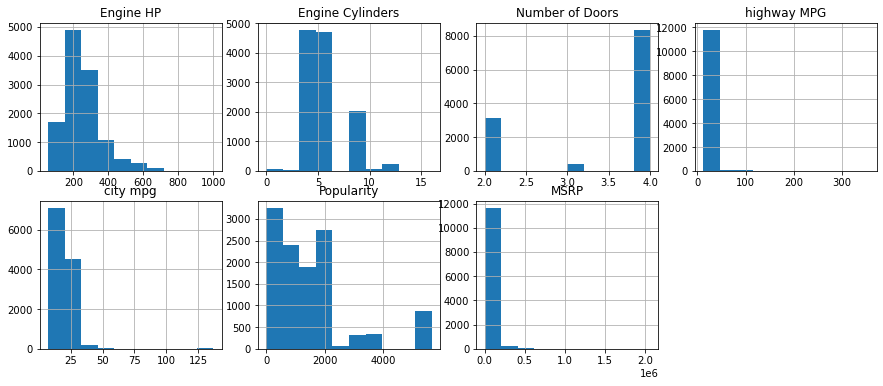

In [23]:
plt.figure(figsize=(15,6))
for x in range(7):
    plt.subplot(2,4,x+1)
    no_miss_num.iloc[:,x].hist(alpha = 1)
    plt.title(no_miss_num.columns[x])

In [24]:
#aa = pd.DataFrame(x_ttrain, columns = no_miss.columns)

Text(0.5, 1.0, 'Correlation Map Between Variables')

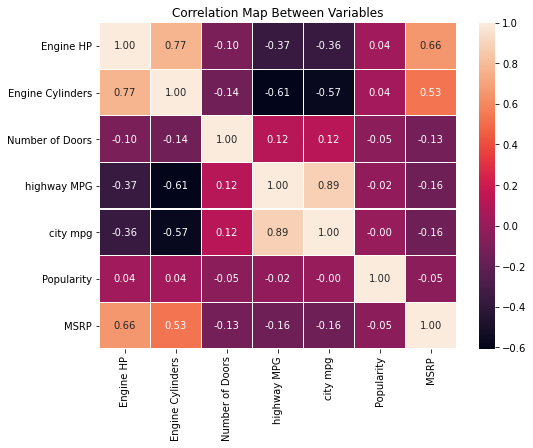

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(no_miss_num.corr(method = 'pearson'), annot = True, fmt = '.2f', linewidths = 0.1, linecolor= 'white', \
           annot_kws={'size':10})
plt.title('Correlation Map Between Variables')

In [26]:
#no_miss.to_csv('../Team Project/Datasets/result.csv')

<a id='splitandtest'></a>
### Split Data To Train and Test

Spliting data for training and testing, trained data size is 80% and test data size is 20%.

In [32]:
y = no_miss['MSRP']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(no_miss.drop(columns = 'MSRP'), y, test_size=0.2, random_state = 5002)

In [34]:
y1 = no_miss1['MSRP']

In [35]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(no_miss1.drop(columns = 'MSRP'), y1, test_size=0.2, random_state = 5002)

In [36]:
y2 = no_miss2['MSRP']

In [37]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(no_miss2.drop(columns = 'MSRP'), y2, test_size=0.2, random_state = 5002)

In [38]:
#no_miss_num = x_train.loc[:,['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',\
#                             'highway MPG','city mpg','Popularity','MSRP']]

In [39]:
#no_miss_cat = x_train.loc[:,['Make', 'Model','Engine Fuel Type', 'Transmission Type',\
#                            'Driven_Wheels','Vehicle Size','Vehicle Style']]

<a id='normalize'></a>
### Data Normalization

In [40]:
ct = ColumnTransformer([
      ('scale', StandardScaler(),
      make_column_selector(dtype_include=np.number)),
      ('OneHot',
      OneHotEncoder(handle_unknown='ignore'),
      make_column_selector(dtype_include=object))])

In [41]:
ct.fit(x_train)

ColumnTransformer(transformers=[('scale', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000014DD9F6BC40>),
                                ('OneHot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000014DDA000C40>)])

In [42]:
x_ttrain = ct.transform(x_train)

In [43]:
x_ttest = ct.transform(x_test)

In [44]:
x_ttrain.shape

(9531, 1515)

In [45]:
x_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9531 entries, 6210 to 2241
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               9531 non-null   object
 1   Engine Fuel Type   9531 non-null   object
 2   Engine HP          9531 non-null   object
 3   Engine Cylinders   9531 non-null   object
 4   Transmission Type  9531 non-null   object
 5   Driven_Wheels      9531 non-null   object
 6   Number of Doors    9531 non-null   object
 7   Vehicle Size       9531 non-null   object
 8   Vehicle Style      9531 non-null   object
 9   highway MPG        9531 non-null   object
 10  city mpg           9531 non-null   object
 11  Popularity         9531 non-null   object
 12  Make_Model         9531 non-null   object
dtypes: object(13)
memory usage: 1.0+ MB


In [46]:
#x_ttrain1=ct.fit_transform(x_train1.astype(str))

In [47]:
ct.fit(x_train1.astype(str))

ColumnTransformer(transformers=[('scale', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000014DD9F6BC40>),
                                ('OneHot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000014DDA000C40>)])

In [48]:
x_ttrain1 = ct.transform(x_train1.astype(str))

In [49]:
x_ttest1 = ct.transform(x_test1.astype(str))

In [50]:
ct.fit(x_train2)

ColumnTransformer(transformers=[('scale', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000014DD9F6BC40>),
                                ('OneHot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000014DDA000C40>)])

In [51]:
x_ttrain2 = ct.transform(x_train2)

In [52]:
x_ttest2 = ct.transform(x_test2)

<a id='trainandtest'></a>
## 3. Data Training and Testing
<a href=#top>(back to top)</a>

<a id='linear'></a>
### Linear Regression Model

The R2 value is: 0.97934


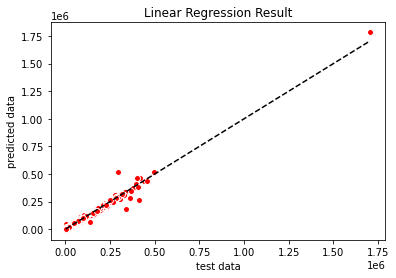

In [53]:
linear = LinearRegression() # Linear Regression
linear.fit(x_ttrain,y_train)
y_pre_linear = linear.predict(x_ttest)
linear_score = r2_score(y_test,y_pre_linear)
#linear_score = cross_val_score(linear, y_test,y_pre_linear,cv=5,scoring = "r2").mean()

plt.scatter(y_test, y_pre_linear, c = 'red', marker = 'o', edgecolors = 'white')
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('Linear Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

print(f'The R2 value is: {linear_score.round(5)}')

The R2 value is: 0.97935


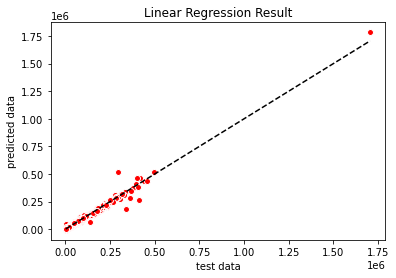

In [54]:
linear = LinearRegression() # Linear Regression
linear.fit(x_ttrain1,y_train1)
y_pre_linear = linear.predict(x_ttest1)
linear_score = r2_score(y_test1,y_pre_linear)
#linear_score = cross_val_score(linear, y_test,y_pre_linear,cv=5,scoring = "r2").mean()

plt.scatter(y_test1, y_pre_linear, c = 'red', marker = 'o', edgecolors = 'white')
plt.plot([y_test1.min(),y_test1.max()], [y_test1.min(),y_test1.max()], 'k--')
plt.title('Linear Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

print(f'The R2 value is: {linear_score.round(5)}')

The R2 value is: 0.97909


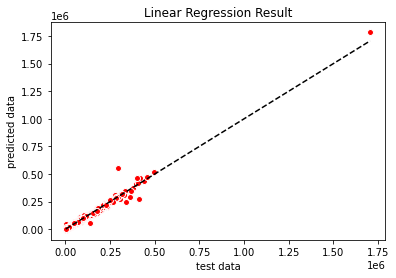

In [55]:
linear = LinearRegression() # Linear Regression
linear.fit(x_ttrain2,y_train2)
y_pre_linear = linear.predict(x_ttest2)
linear_score = r2_score(y_test2,y_pre_linear)
#linear_score = cross_val_score(linear, y_test,y_pre_linear,cv=5,scoring = "r2").mean()

plt.scatter(y_test2, y_pre_linear, c = 'red', marker = 'o', edgecolors = 'white')
plt.plot([y_test2.min(),y_test2.max()], [y_test2.min(),y_test2.max()], 'k--')
plt.title('Linear Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

print(f'The R2 value is: {linear_score.round(5)}')

In [162]:
linear_EV = explained_variance_score(y_test, y_pre_linear)
linear_MAE = mean_absolute_error(y_test, y_pre_linear)
linear_MSE = mean_squared_error(y_test, y_pre_linear)
linear_RMSE = np.sqrt(mean_squared_error(y_test, y_pre_linear))

print('Linear Expained Value (EV)：',linear_EV.round(5))
print('Linear Mean Absolute Error (MAE)：',linear_MAE.round(5))
print('Linear Mean Squared Error (MSE)：',linear_MSE.round(5))
print('Linear Rooted Mean Squared Error (RMSE)：',linear_RMSE.round(5))

Linear Expained Value (EV)： 0.97934
Linear Mean Absolute Error (MAE)： 3055.78682
Linear Mean Squared Error (MSE)： 67731675.64578
Linear Rooted Mean Squared Error (RMSE)： 8229.92562


<a id='ridege'></a>
### Ridege Regression Model

The R2 value is: 0.96617


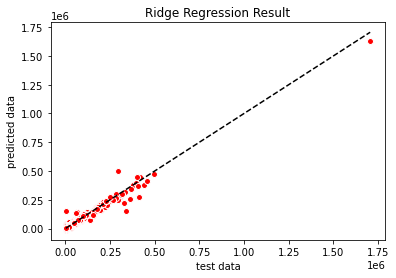

In [164]:
ridge = Ridge() # Ridge Regression
ridge.fit(x_ttrain,y_train)
y_pre_ridge = ridge.predict(x_ttest)
ridge_score =r2_score(y_test,y_pre_ridge)

plt.scatter(y_test, y_pre_ridge, c = 'red', marker = 'o', edgecolors = 'white')
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('Ridge Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

print(f'The R2 value is: {ridge_score.round(5)}')

In [165]:
ridge_EV = explained_variance_score(y_test, y_pre_ridge)
ridge_MAE = mean_absolute_error(y_test, y_pre_ridge)
ridge_MSE = mean_squared_error(y_test, y_pre_ridge)
ridge_RMSE = np.sqrt(ridge_MSE)

print('Ridge Expained Value (EV)：',ridge_EV.round(5))
print('Ridge Mean Absolute Error (MAE)：',ridge_MAE.round(5))
print('Ridge Mean Squared Error (MSE)：',ridge_MSE.round(5))
print('Ridge Rooted Mean Squared Error (RMSE)：',ridge_RMSE.round(5))

Ridge Expained Value (EV)： 0.96617
Ridge Mean Absolute Error (MAE)： 4654.39512
Ridge Mean Squared Error (MSE)： 110913285.7094
Ridge Rooted Mean Squared Error (RMSE)： 10531.53767


<a id='knn'></a>
### KNN Regression Model

Default configuration:
K = 5

The cross validation R2 score is: 0.87693


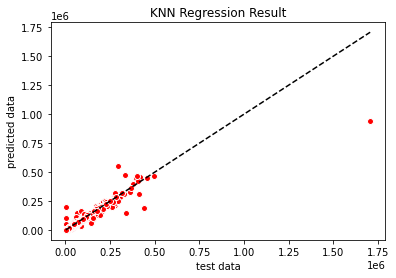

In [167]:
knn = KNeighborsRegressor(weights = 'uniform') # Knn Regression
knn.fit(x_ttrain,y_train)
y_pre_knn = knn.predict(x_ttest)
knn_score1 = r2_score(y_test,y_pre_knn)
#adj_r2 = (1 - (1 - knn_score) * ((train.shape[0] - 1) / (train.shape[0] - train.shape[1] - 1)))
#knn_cross_val_score = cross_val_score(knn, x_train, y_train, cv=10 ,scoring = "r2")
#print(knn_cross_val_score)
#knn_score1 = cross_val_score(knn,x_ttrain,y_train,cv=5,scoring='r2').mean()

plt.scatter(y_test, y_pre_knn, c = 'red', marker = 'o', edgecolors = 'white')
#sns.scatterplot(y_true, y_pre_linear)
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('KNN Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

#print(f'The R2 value is: {knn_score.round(5)}')
#print(f'The Adjusted R2 value is: {adj_r2.round(5)}')
print(f'The cross validation R2 score is: {knn_score1.round(5)}')

In [168]:
knn_EV = explained_variance_score(y_test, y_pre_knn)
knn_MAE = mean_absolute_error(y_test, y_pre_knn)
knn_MSE = mean_squared_error(y_test, y_pre_knn)
knn_RMSE = np.sqrt(knn_MSE)

print('KNN Expained Value (EV)：',knn_EV.round(5))
print('KNN Mean Absolute Error (MAE)：',knn_MAE.round(5))
print('KNN Mean Squared Error (MSE)：',knn_MSE.round(5))
print('KNN Rooted Mean Squared Error (RMSE)：',knn_RMSE.round(5))

KNN Expained Value (EV)： 0.87695
KNN Mean Absolute Error (MAE)： 4659.6543
KNN Mean Squared Error (MSE)： 403482392.47555
KNN Rooted Mean Squared Error (RMSE)： 20086.87115


#### Parameter adjustment

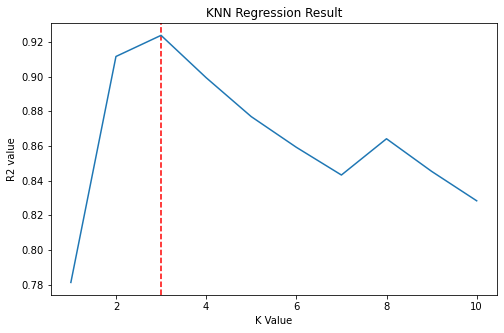

Running time: 0 min


In [100]:
start = time()

score_list =[]
for i in np.arange(1,11):
    knn = KNeighborsRegressor(i,weights='uniform')
    knn.fit(x_ttrain,y_train)
    y_pre_knn = knn.predict(x_ttest)
    #score = cross_val_score(knn,x_ttest,y_test,cv=5,scoring='r2').mean()
    score = r2_score(y_test,y_pre_knn)
    score_list.append(score)
    scoreall = np.array(score_list)

plt.figure(figsize=[8,5])
plt.axvline(x = 3.0, c = 'r', ls = '--')
plt.plot(range(1,11),score_list)
plt.title('KNN Regression Result')
plt.xlabel('K Value')
plt.ylabel('R2 value')
plt.show()

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

The cross validation R2 score is: 0.92381


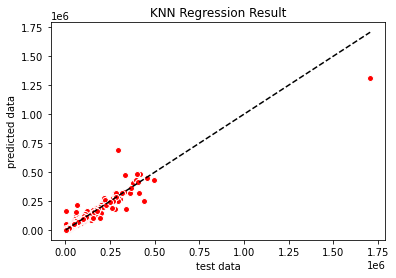

In [101]:
knn = KNeighborsRegressor(n_neighbors=3, weights = 'uniform') # Knn Regression
knn.fit(x_ttrain,y_train)
y_pre_knn = knn.predict(x_ttest)
knn_score1 = r2_score(y_test,y_pre_knn)
#adj_r2 = (1 - (1 - knn_score) * ((train.shape[0] - 1) / (train.shape[0] - train.shape[1] - 1)))
#knn_cross_val_score = cross_val_score(knn, x_train, y_train, cv=10 ,scoring = "r2")
#print(knn_cross_val_score)
#knn_score1 = cross_val_score(knn,x_ttrain,y_train,cv=5,scoring='r2').mean()

plt.scatter(y_test, y_pre_knn, c = 'red', marker = 'o', edgecolors = 'white')
#sns.scatterplot(y_true, y_pre_linear)
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('KNN Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

#print(f'The R2 value is: {knn_score.round(5)}')
#print(f'The Adjusted R2 value is: {adj_r2.round(5)}')
print(f'The cross validation R2 score is: {knn_score1.round(5)}')

<a id='decision'></a>
### Decision Tree Regression Model

The cross validation R2 score is: 0.95828


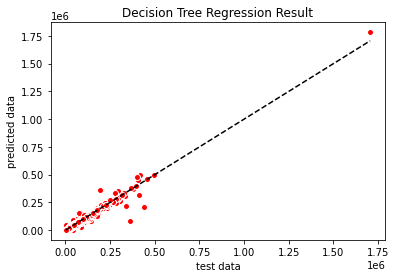

In [169]:
decision = DecisionTreeRegressor() # Decision Tree Regression
decision.fit(x_ttrain,y_train)
y_pre_decision = decision.predict(x_ttest)
DT_score =r2_score(y_test,y_pre_decision)
#adj_r2 = (1 - (1 - decision_score) * ((train.shape[0] - 1) / (train.shape[0] - train.shape[1] - 1)))
#DT_score = cross_val_score(decision, x_ttrain, y_train, cv=5 ,scoring = "r2").mean()
#neg_mean_squared_error
plt.scatter(y_test, y_pre_decision, c = 'red', marker = 'o', edgecolors = 'white')
#sns.scatterplot(y_true, y_pre_linear)
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('Decision Tree Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

#print(f'The R2 value is: {decision_score.round(5)}')
#print(f'The Adjusted R2 value is: {decision_score.round(5)}')
print(f'The cross validation R2 score is: {DT_score.round(5)}')

In [170]:
DT_EV = explained_variance_score(y_test, y_pre_decision)
DT_MAE = mean_absolute_error(y_test, y_pre_decision)
DT_MSE = mean_squared_error(y_test, y_pre_decision)
DT_RMSE = np.sqrt(DT_MSE)

print('DT Expained Value (EV)：',DT_EV.round(5))
print('DT Mean Absolute Error (MAE)：',DT_MAE.round(5))
print('DT Mean Squared Error (MSE)：',DT_MSE.round(5))
print('DT Rooted Mean Squared Error (RMSE)：',DT_RMSE.round(5))

DT Expained Value (EV)： 0.95829
DT Mean Absolute Error (MAE)： 3876.13604
DT Mean Squared Error (MSE)： 136782492.02897
DT Rooted Mean Squared Error (RMSE)： 11695.40474


<a id='rfr'></a>
### Random Forest Regression Model

#### Random Forest Regression (using original data)

Default configuration:

n_estimators = 100\
max_depth = None\
min_samples_leaf = 1\
min_samples_split = 2\
max_features = 'auto'

In [172]:
#Calculate oob score
start = time()

rfr = RandomForestRegressor(random_state = 5022, oob_score = True) # Random Forest Regression
rfr.fit(x_ttrain,y_train)
rfr_y_predict = rfr.predict(x_ttest)
oob_score1 = rfr.oob_score_
#score = r2_score(y_test,rfr_y_predict)

print(f'The oob_score is: {oob_score1.round(3)}')
#print(r2_score)

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

The oob_score is: 0.902
Running time: 0 min


The train R2 score is: 0.78957
The test R2 score is: 0.96895
The predict R2 score is: 0.96895
Running time: 1 min


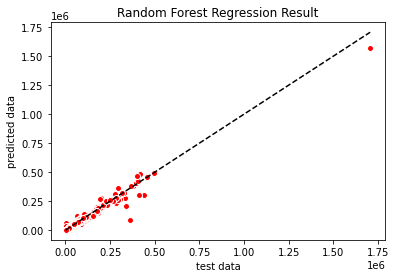

In [173]:
start = time()
'''
rfr = RandomForestRegressor(random_state = 5022) # Random Forest Regression
rfr.fit(x_train,y_train)
rfr_y_predict = rfr.predict(x_test)'''
#rfr_score = rfr.oob_score_
#rfr_r2_score_train1 = rfr.score(x_train, y_train)
rfr_r2_score_train1 = cross_val_score(rfr,x_ttrain,y_train,cv=3,scoring='r2').mean()
rfr_r2_score_test1 = rfr.score(x_ttest,y_test)
rfr_r2_score1 = r2_score(y_test,rfr_y_predict)

plt.scatter(y_test, rfr_y_predict, c = 'red', marker = 'o', edgecolors = 'white')
#sns.scatterplot(y_true, y_pre_linear)
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('Random Forest Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

#print(f'The obb score is: {rfr_score.round(3)}')
print(f'The train R2 score is: {rfr_r2_score_train1.round(5)}')
print(f'The test R2 score is: {rfr_r2_score_test1.round(5)}')
print(f'The predict R2 score is: {rfr_r2_score1.round(5)}')

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

In [174]:
rfr_EV1 = explained_variance_score(y_test, rfr_y_predict)
rfr_MAE1 = mean_absolute_error(y_test, rfr_y_predict)
rfr_MSE1 = mean_squared_error(y_test, rfr_y_predict)
rfr_RMSE1 = np.sqrt(mean_squared_error(y_test, rfr_y_predict))

print('RF Expained Value (EV)：',rfr_EV1.round(5))
print('RF Mean Absolute Error (MAE)：',rfr_MAE1.round(5))
print('RF Mean Squared Error (MSE)：',rfr_MSE1.round(5))
print('RF Rooted Mean Squared Error (RMSE)：',rfr_RMSE1.round(5))

RF Expained Value (EV)： 0.96898
RF Mean Absolute Error (MAE)： 3716.31467
RF Mean Squared Error (MSE)： 101802229.6377
RF Rooted Mean Squared Error (RMSE)： 10089.7091


In [100]:
#score1 = cross_val_score(rfr,x_train,y_train,cv=10,scoring='neg_mean_absolute_error').mean()
#score2 = cross_val_score(rfr,x_train,y_train,cv=10,scoring='neg_root_mean_squared_error').mean()
#score3 = cross_val_score(rfr,x_train,y_train,cv=10,scoring='neg_mean_squared_error').mean()

In [99]:
#print(score1, score2,score3)

#### Parameters adjustment (using original data)

n_estimators\
max_depth\
min_samples_leaf\
min_samples_split\
max_features

In [103]:
for i in range(10,511,50):
    print(i)

10
60
110
160
210
260
310
360
410
460
510


Optimized parameters and respective score: [260.           0.90465839]


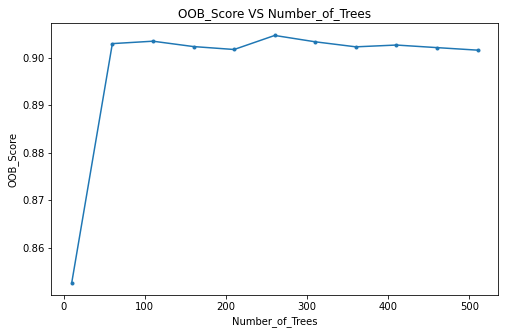

Running time: 21 min


In [109]:
#n_estimators adjustment
start = time()

import warnings
warnings.filterwarnings('ignore')

ScoreAll = []
for i in range(10,511,50):
    rfr = RandomForestRegressor(n_estimators = i, random_state = 5022, oob_score = True) # Random Forest Regression
    rfr.fit(x_ttrain,y_train)
    rfr_y_predict = rfr.predict(x_ttest)
    #score = r2_score(y_test,rfr_y_predict)
    score = rfr.oob_score_
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0]
print("Optimized parameters and respective score:",ScoreAll[max_score])  
plt.figure(figsize=[8,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1],marker = '.')
plt.title('OOB_Score VS Number_of_Trees')
plt.xlabel('Number_of_Trees')
plt.ylabel('OOB_Score')
plt.show()

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

In [110]:
for i in range(210,311,10):
    print(i)

210
220
230
240
250
260
270
280
290
300
310


Optimized parameters and respective score: [290.           0.90519996]


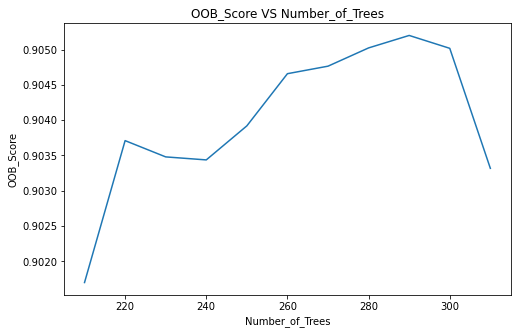

Running time: 21 min


In [111]:
#Narrow down the range of n_estimators

start = time()

import warnings
warnings.filterwarnings('ignore')

ScoreAll = []
for i in range(210,311,10):
    rfr = RandomForestRegressor(n_estimators = i, random_state = 5022, oob_score = True) # Random Forest Regression
    rfr.fit(x_ttrain,y_train)
    rfr_y_predict = rfr.predict(x_ttest)
    #score = r2_score(y_test,rfr_y_predict)
    score = rfr.oob_score_
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0]
print("Optimized parameters and respective score:",ScoreAll[max_score])  
plt.figure(figsize=[8,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.title('OOB_Score VS Number_of_Trees')
plt.xlabel('Number_of_Trees')
plt.ylabel('OOB_Score')
plt.show()

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

Optimized parameters and respective score: [285.           0.90541181]


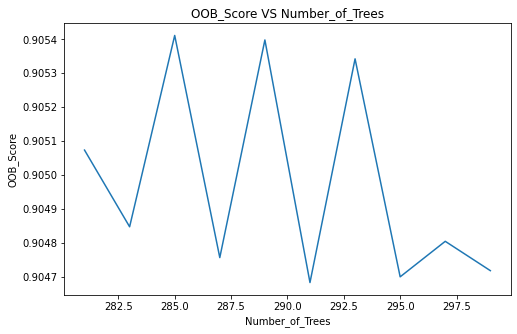

Running time: 21 min


In [112]:
#Narrow down the range of n_estimators

start = time()

import warnings
warnings.filterwarnings('ignore')

ScoreAll = []
for i in range(281,300,2):
    rfr = RandomForestRegressor(n_estimators = i, random_state = 5022, oob_score = True) # Random Forest Regression
    rfr.fit(x_ttrain,y_train)
    rfr_y_predict = rfr.predict(x_ttest)
    #score = r2_score(y_test,rfr_y_predict)
    score = rfr.oob_score_
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0]
print("Optimized parameters and respective score:",ScoreAll[max_score])  
plt.figure(figsize=[8,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.title('OOB_Score VS Number_of_Trees')
plt.xlabel('Number_of_Trees')
plt.ylabel('OOB_Score')
plt.show()

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

Optimized parameters and respective score: [45.          0.90580138]


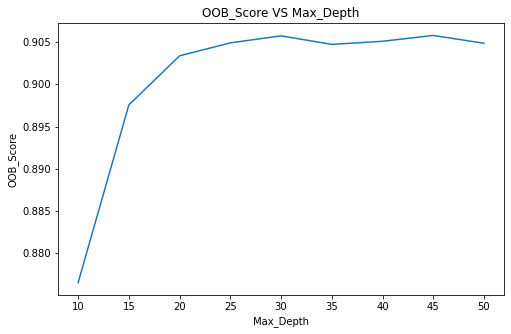

Running time: 12 min


In [115]:
###Max_depth parameters

start = time()

ScoreAll = []
for i in range(10,51,5):
    rfr = RandomForestRegressor(n_estimators = 285, random_state = 5022,\
                                max_depth = i, oob_score = True) # Random Forest Regression
    rfr.fit(x_ttrain,y_train)
    rfr_y_predict = rfr.predict(x_ttest)
    #score = r2_score(y_test,rfr_y_predict)
    score = rfr.oob_score_
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0]
print("Optimized parameters and respective score:",ScoreAll[max_score])  
plt.figure(figsize=[8,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.title('OOB_Score VS Max_Depth')
plt.xlabel('Max_Depth')
plt.ylabel('OOB_Score')
plt.show()

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

Optimized parameters and respective score: [2.         0.90580138]


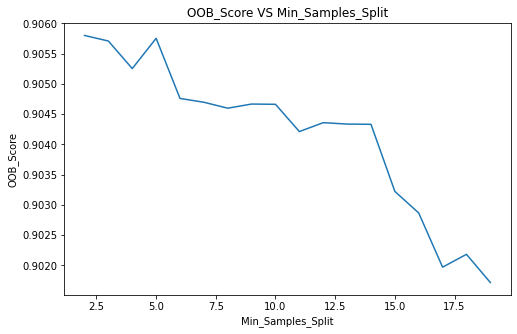

Running time: 25 min


In [116]:
#Min_samples_split
start = time()

ScoreAll = []
for i in range(2,20):
    rfr = RandomForestRegressor(n_estimators = 285, random_state = 5022,\
                                max_depth = 45, min_samples_split = i, oob_score = True) # Random Forest Regression
    rfr.fit(x_ttrain,y_train)
    rfr_y_predict = rfr.predict(x_ttest)
    #score = r2_score(y_test,rfr_y_predict)
    score = rfr.oob_score_
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0]
print("Optimized parameters and respective score:",ScoreAll[max_score])  
plt.figure(figsize=[8,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.title('OOB_Score VS Min_Samples_Split')
plt.xlabel('Min_Samples_Split')
plt.ylabel('OOB_Score')
plt.show()

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

Optimized parameters and respective score: [1.         0.90580138]


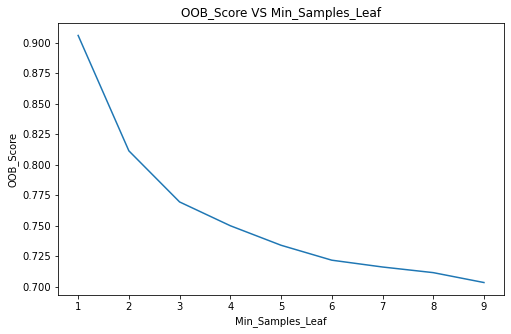

Running time: 11 min


In [117]:
#Min_samples_leaf
start = time()

ScoreAll = []
for i in range(1,10):
    rfr = RandomForestRegressor(n_estimators = 285,random_state = 5022,max_depth =45,\
                                 min_samples_leaf = i,min_samples_split = 2, oob_score = True ) 
    rfr.fit(x_ttrain,y_train)
    rfr_y_predict = rfr.predict(x_ttest)
    #score = r2_score(y_test,rfr_y_predict)
    score = rfr.oob_score_
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] 
print("Optimized parameters and respective score:",ScoreAll[max_score])  
plt.figure(figsize=[8,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.title('OOB_Score VS Min_Samples_Leaf')
plt.xlabel('Min_Samples_Leaf')
plt.ylabel('OOB_Score')
plt.show()

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

Optimized parameters and respective score: [600.           0.90248374]


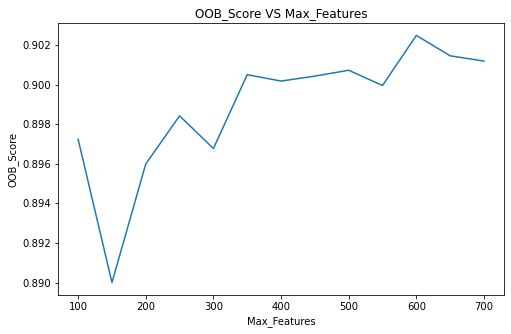

Running time: 14 min


In [118]:
#Max_features
start = time()

ScoreAll = []
for i in range(100,701,50):
    rfr = RandomForestRegressor(random_state = 5022,n_estimators = 285,max_depth = 45,\
                                 min_samples_leaf =1 ,min_samples_split = 2, max_features = i, oob_score = True )
    rfr.fit(x_ttrain,y_train)
    rfr_y_predict = rfr.predict(x_ttest)
    #score = r2_score(y_test,rfr_y_predict)
    score = rfr.oob_score_
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] 
print("Optimized parameters and respective score:",ScoreAll[max_score])  
plt.figure(figsize=[8,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.title('OOB_Score VS Max_Features')
plt.xlabel('Max_Features')
plt.ylabel('OOB_Score')
plt.show()

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

Optimized parameters and respective score: [610.       0.9029]


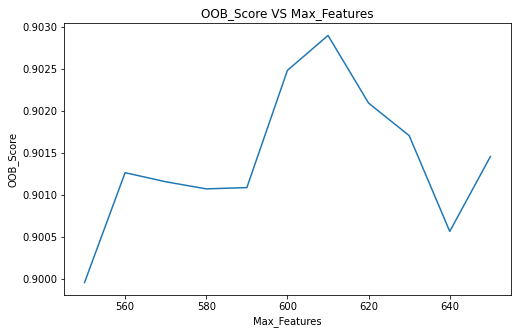

Running time: 13 min


In [119]:
#Max_features
start = time()

ScoreAll = []
for i in range(550,651,10):
    rfr = RandomForestRegressor(random_state = 5022,n_estimators = 285,max_depth = 45,\
                                 min_samples_leaf =1 ,min_samples_split = 2, max_features = i, oob_score = True )
    rfr.fit(x_ttrain,y_train)
    rfr_y_predict = rfr.predict(x_ttest)
    #score = r2_score(y_test,rfr_y_predict)
    score = rfr.oob_score_
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] 
print("Optimized parameters and respective score:",ScoreAll[max_score])  
plt.figure(figsize=[8,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.title('OOB_Score VS Max_Features')
plt.xlabel('Max_Features')
plt.ylabel('OOB_Score')
plt.show()

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

<a id='neural'></a>
### Neural Network Regression Model

MLP R2 Score:  0.86804


C:\Users\Chao\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[]

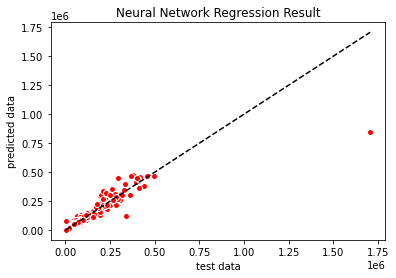

In [105]:
#clf = MLPRegressor(solver='sgd', alpha=1e-5, hidden_layer_sizes=(2, 1), random_state=5022)
#clf = MLPRegressor(hidden_layer_sizes=(200, 200), tol=1e-2, max_iter=1000, learning_rate_init=0.001,random_state=5022)

clf = MLPRegressor(
    hidden_layer_sizes=(20,20,20),  max_iter=200, activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.001, power_t=0.5,  shuffle=True,
    random_state=5022, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False,beta_1=0.9, beta_2=0.999, epsilon=1e-08)

# Data Training
clf.fit(x_ttrain,y_train.ravel())
y_pre_clf = clf.predict(x_ttest)

clf_score1 = r2_score(y_test, y_pre_clf).round(5)
print('MLP R2 Score: ',clf_score1)

#plt.plot(y_test,label = 'true')
#plt.plot(y_pre_clf,label ='Netural Network')
#plt.legend()
#plt.show()

plt.scatter(y_test, y_pre_clf, c = 'red', marker = 'o', edgecolors = 'white')
#sns.scatterplot(y_true, y_pre_linear)
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('Neural Network Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

MLP R2 Score:  0.74056


C:\Users\Chao\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[]

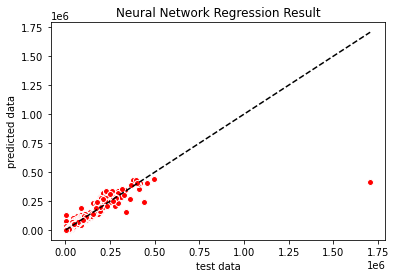

In [106]:
#clf = MLPRegressor(solver='sgd', alpha=1e-5, hidden_layer_sizes=(2, 1), random_state=5022)
#clf = MLPRegressor(hidden_layer_sizes=(200, 200), tol=1e-2, max_iter=1000, learning_rate_init=0.001,random_state=5022)

clf = MLPRegressor(
    hidden_layer_sizes=(8,8,8),  max_iter=200, activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.001, power_t=0.5,  shuffle=True,
    random_state=5022, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False,beta_1=0.9, beta_2=0.999, epsilon=1e-08)

# Data Training
clf.fit(x_ttrain,y_train.ravel())
y_pre_clf = clf.predict(x_ttest)

clf_score1 = r2_score(y_test, y_pre_clf).round(5)
print('MLP R2 Score: ',clf_score1)

#plt.plot(y_test,label = 'true')
#plt.plot(y_pre_clf,label ='Netural Network')
#plt.legend()
#plt.show()

plt.scatter(y_test, y_pre_clf, c = 'red', marker = 'o', edgecolors = 'white')
#sns.scatterplot(y_true, y_pre_linear)
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('Neural Network Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

### parameters adjustment

In [128]:
clf = MLPRegressor(hidden_layer_sizes = (50,))

# Data Training
clf.fit(x_ttrain,y_train.ravel())
y_pre_clf = clf.predict(x_ttest)

clf_score1 = r2_score(y_test, y_pre_clf).round(5)
print('MLP R2 Score: ',clf_score1)

MLP R2 Score:  0.05051


C:\Users\Chao\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [127]:
clf = MLPRegressor(hidden_layer_sizes = (500,))

# Data Training
clf.fit(x_ttrain,y_train.ravel())
y_pre_clf = clf.predict(x_ttest)

clf_score1 = r2_score(y_test, y_pre_clf).round(5)
print('MLP R2 Score: ',clf_score1)

MLP R2 Score:  0.51983


C:\Users\Chao\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [124]:
clf = MLPRegressor(hidden_layer_sizes = (50,50))

# Data Training
clf.fit(x_ttrain,y_train.ravel())
y_pre_clf = clf.predict(x_ttest)

clf_score1 = r2_score(y_test, y_pre_clf).round(5)
print('MLP R2 Score: ',clf_score1)

MLP R2 Score:  0.77519


C:\Users\Chao\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [107]:
clf = MLPRegressor(hidden_layer_sizes = (500,500))

# Data Training
clf.fit(x_ttrain,y_train.ravel())
y_pre_clf = clf.predict(x_ttest)

clf_score1 = r2_score(y_test, y_pre_clf).round(5)
print('MLP R2 Score: ',clf_score1)

MLP R2 Score:  0.96496


C:\Users\Chao\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [129]:
clf = MLPRegressor(hidden_layer_sizes = (50,50,50))

# Data Training
clf.fit(x_ttrain,y_train.ravel())
y_pre_clf = clf.predict(x_ttest)

clf_score1 = r2_score(y_test, y_pre_clf).round(5)
print('MLP R2 Score: ',clf_score1)

MLP R2 Score:  0.96641


C:\Users\Chao\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [131]:
clf = MLPRegressor(hidden_layer_sizes = (50,50,50,50))

# Data Training
clf.fit(x_ttrain,y_train.ravel())
y_pre_clf = clf.predict(x_ttest)

clf_score1 = r2_score(y_test, y_pre_clf).round(5)
print('MLP R2 Score: ',clf_score1)

MLP R2 Score:  0.97025


In [132]:
clf = MLPRegressor(hidden_layer_sizes = (50,50,50,50,50))

# Data Training
clf.fit(x_ttrain,y_train.ravel())
y_pre_clf = clf.predict(x_ttest)

clf_score1 = r2_score(y_test, y_pre_clf).round(5)
print('MLP R2 Score: ',clf_score1)

MLP R2 Score:  0.96941


In [134]:
clf = MLPRegressor(hidden_layer_sizes = (100,100,100,100))

# Data Training
clf.fit(x_ttrain,y_train.ravel())
y_pre_clf = clf.predict(x_ttest)

clf_score1 = r2_score(y_test, y_pre_clf).round(5)
print('MLP R2 Score: ',clf_score1)

MLP R2 Score:  0.96794


In [139]:
clf = MLPRegressor(hidden_layer_sizes = (60,60,60,60))

# Data Training
clf.fit(x_ttrain,y_train.ravel())
y_pre_clf = clf.predict(x_ttest)

clf_score1 = r2_score(y_test, y_pre_clf).round(5)
print('MLP R2 Score: ',clf_score1)

MLP R2 Score:  0.97025


In [140]:
clf = MLPRegressor(hidden_layer_sizes = (40,40,40,40))

# Data Training
clf.fit(x_ttrain,y_train.ravel())
y_pre_clf = clf.predict(x_ttest)

clf_score1 = r2_score(y_test, y_pre_clf).round(5)
print('MLP R2 Score: ',clf_score1)

MLP R2 Score:  0.96845


In [141]:
import warnings
warnings.filterwarnings("ignore")

hidden_layer_sizes = [(i,i,i,i) for i in np.arange(40,101,10)]

clf = MLPRegressor()

grid = GridSearchCV(clf, {'hidden_layer_sizes':hidden_layer_sizes}, cv = 3, verbose = 1)
grid_result = grid.fit(x_ttrain, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed: 14.7min finished


In [142]:
grid.best_estimator_

MLPRegressor(hidden_layer_sizes=(90, 90, 90, 90))

In [143]:
grid.best_score_

0.8593831565797196

In [145]:
import warnings
warnings.filterwarnings("ignore")

hidden_layer_sizes = [(i,i,i,i) for i in np.arange(90,101)]

clf = MLPRegressor()

grid = GridSearchCV(clf, {'hidden_layer_sizes':hidden_layer_sizes}, cv = 3, verbose = 1)
grid_result = grid.fit(x_ttrain, y_train)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed: 43.6min finished


In [148]:
grid.best_estimator_

MLPRegressor(hidden_layer_sizes=(96, 96, 96, 96))

In [149]:
grid.best_score_

0.8619913929158551

In [150]:
import warnings
warnings.filterwarnings("ignore")

learn_rate = [0.001,0.01, 0.1, 0.2, 0.4]  
param_grid = dict(learning_rate_init=learn_rate) 

clf = MLPRegressor(hidden_layer_sizes = (96,96,96,96))

grid = GridSearchCV(clf, {'learning_rate_init' : learn_rate}, cv = 3, verbose = 1)
grid_result = grid.fit(x_ttrain, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  8.8min finished


In [153]:
grid.best_params_

{'learning_rate_init': 0.001}

In [154]:
grid.best_score_

0.8581227588100968

In [155]:
import warnings
warnings.filterwarnings("ignore")

iterate = [500,1000,5000,10000]

clf = MLPRegressor(hidden_layer_sizes = (96,96,96,96),learning_rate_init=0.001)

grid = GridSearchCV(clf, {'max_iter' : iterate}, cv = 3, verbose = 1)
grid_result = grid.fit(x_ttrain, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 17.6min finished


In [156]:
grid.best_estimator_

MLPRegressor(hidden_layer_sizes=(96, 96, 96, 96), max_iter=5000)

In [157]:
grid.best_score_

0.8588895600909859

In [158]:
import warnings
warnings.filterwarnings("ignore")

iterate = np.arange(2000,9001,1000)

clf = MLPRegressor(hidden_layer_sizes = (96,96,96,96),learning_rate_init=0.001)

grid = GridSearchCV(clf, {'max_iter' : iterate}, cv = 3, verbose = 1)
grid_result = grid.fit(x_ttrain, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 31.9min finished


In [159]:
grid.best_estimator_

MLPRegressor(hidden_layer_sizes=(96, 96, 96, 96), max_iter=9000)

In [289]:
grid.best_score_

0.9378000277645145

In [207]:
import warnings
warnings.filterwarnings("ignore")

activation = ['identity', 'logistic', 'tanh', 'relu']
param_grid = dict(activation=activation)

clf = MLPRegressor(hidden_layer_sizes = (96,96,96,96),learning_rate_init=0.001,max_iter=9000)

grid = GridSearchCV(clf, param_grid=param_grid, cv = 3, verbose = 1)
grid_result = grid.fit(x_ttrain, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 28.4min finished


In [210]:
grid.best_params_

{'activation': 'relu'}

In [211]:
grid.best_score_

0.936654128869371

In [160]:
clf = MLPRegressor(hidden_layer_sizes = (90,90,90,90),learning_rate_init=0.001,max_iter=9000,activation= 'relu')

# Data Training
clf.fit(x_ttrain,y_train.ravel())
y_pre_clf = clf.predict(x_ttest)

clf_score1 = r2_score(y_test, y_pre_clf).round(5)
print('MLP R2 Score: ',clf_score1)

MLP R2 Score:  0.97027


<a id='predict'></a>
## 4. Data Prediction Improvement
<a href=#top>(back to top)</a>

<a id='pre'></a>
### Data Prediction with Random Forest Model

#### Random Forest Regression

Optimized configuration:

n_estimators = 285\
max_depth = 45\
min_samples_leaf = 1\
min_samples_split = 2\
max_features = 610

In [175]:
start = time()
rfr = RandomForestRegressor(random_state = 5022,
                            n_estimators = 285,
                            max_depth = 45,
                            min_samples_leaf = 1,
                            min_samples_split = 2,
                            max_features = 610,
                            oob_score = True ) # Random Forest Regression
rfr.fit(x_ttrain,y_train)
rfr_y_predict = rfr.predict(x_ttest)
oob_score3 = rfr.oob_score_
#score = r2_score(y_test,rfr_y_predict)

print(f'The oob_score is: {oob_score3.round(3)}')
#print(r2_score)

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

The oob_score is: 0.903
Running time: 1 min


The R2 score is: 0.97229
Running time: 0 min


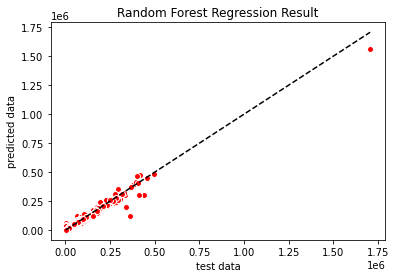

In [176]:
start = time()

#rfr_score = rfr.oob_score_
#cross_val_score_rfr = cross_val_score(rfr, x_train, y_train, cv=10 ,scoring = "r2").mean()
#rfr_r2_score_train3 = cross_val_score(rfr,x_train,y_train,cv=10,scoring='r2').mean()
#rfr_r2_score_test3 = rfr.score(x_test,y_test)

rfr_r2_score3 = r2_score(y_test,rfr_y_predict)
plt.scatter(y_test, rfr_y_predict, c = 'red', marker = 'o', edgecolors = 'white')
#sns.scatterplot(y_true, y_pre_linear)

plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('Random Forest Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

#print(f'The obb score is: {rfr_score.round(3)}')
#print(f'The cross validation R2 score is: {cross_val_score_rfr.round(5)}')
#print(f'The train R2 score is: {rfr_r2_score_train3.round(5)}')
#print(f'The test R2 score is: {rfr_r2_score_test3.round(5)}')
print(f'The R2 score is: {rfr_r2_score3.round(5)}')

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

In [177]:
rfr_EV3 = explained_variance_score(y_test, rfr_y_predict)
rfr_MAE3 = mean_absolute_error(y_test, rfr_y_predict)
rfr_MSE3 = mean_squared_error(y_test, rfr_y_predict)
rfr_RMSE3 = np.sqrt(rfr_MSE3)

print('RF Expained Value (EV)：',rfr_EV3.round(5))
print('RF Mean Absolute Error (MAE)：',rfr_MAE3.round(5))
print('RF Mean Squared Error (MSE)：',rfr_MSE3.round(5))
print('RF Rooted Mean Squared Error (RMSE)：',rfr_RMSE3.round(5))

RF Expained Value (EV)： 0.97232
RF Mean Absolute Error (MAE)： 3686.3906
RF Mean Squared Error (MSE)： 90842365.56337
RF Rooted Mean Squared Error (RMSE)： 9531.12614


<a id='pre1'></a>
### Data Prediction with Neural Network Model

#### Neural Network Regression

Optimized configuration:

hidden layer size = 90x90x90x90\
learning rate init = 0.001\
max iteration = 9000\
activiation = 'relu'

MLP R2 Score:  0.97072


[]

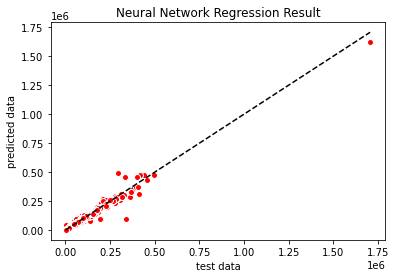

In [178]:
clf = MLPRegressor(hidden_layer_sizes = (90,90,90,90),learning_rate_init=0.001,max_iter=9000,activation= 'relu')

# Data Training
clf.fit(x_ttrain,y_train.ravel())
y_pre_clf2 = clf.predict(x_ttest)

clf_score2 = r2_score(y_test, y_pre_clf2).round(5)
print('MLP R2 Score: ',clf_score2)

plt.scatter(y_test, y_pre_clf2, c = 'red', marker = 'o', edgecolors = 'white')

plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('Neural Network Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

In [179]:
clf_EV3 = explained_variance_score(y_test,y_pre_clf)
clf_MAE3 = mean_absolute_error(y_test,y_pre_clf)
clf_MSE3 = mean_squared_error(y_test,y_pre_clf)
clf_RMSE3 = np.sqrt(clf_MSE3)


print('MLP Expained Value (EV)：',clf_EV3.round(5))
print('MLP Mean Absolute Error (MAE)：',clf_MAE3.round(5))
print('MLP Mean Squared Error (MSE)：',clf_MSE3.round(5))
print('MLP Rooted Mean Squared Error (RMSE)：',clf_RMSE3.round(5))

MLP Expained Value (EV)： 0.97027
MLP Mean Absolute Error (MAE)： 3352.64568
MLP Mean Squared Error (MSE)： 97463842.15105
MLP Rooted Mean Squared Error (RMSE)： 9872.37774


<a id='con'></a>
## 5. Conclusion
<a href=#top>(back to top)</a>

### Evaluation of Different Regression Models

In [180]:
model_eva = pd.DataFrame({'Value':['R2', 'EV', 'MAE', 'MSE', 'RMSE'],
                         'Linear Regression':[linear_score,linear_EV,linear_MAE,linear_MSE,linear_RMSE],
                          'Ridge Regression':[ridge_score,ridge_EV,ridge_MAE,ridge_MSE,ridge_RMSE],
                          'KNN Regression':[knn_score1,knn_EV,knn_MAE,knn_MSE,knn_RMSE],
                          'Decision Tree Regression':[DT_score,DT_EV,DT_MAE,DT_MSE,DT_RMSE],
                          'Random Forest Regression':[rfr_r2_score3,rfr_EV3,rfr_MAE3,rfr_MSE3,rfr_RMSE3],
                          'Neural Network Regression':[clf_score2,clf_EV3,clf_MAE3,clf_MSE3,clf_RMSE3],
                          })
model_eva.set_index(['Value'], inplace = True)

In [181]:
model_eva = pd.DataFrame(model_eva.values.T, index=model_eva.columns, columns=model_eva.index)

In [182]:
model_eva.round(3)

Value,R2,EV,MAE,MSE,RMSE
Linear Regression,0.979,0.979,3055.787,6.773168e+07,8229.926
Ridge Regression,0.966,0.966,4654.395,1.109133e+08,10531.538
KNN Regression,0.877,0.877,4659.654,4.034824e+08,20086.871
Decision Tree Regression,0.958,0.958,3876.136,1.367825e+08,11695.405
Random Forest Regression,0.972,0.972,3686.391,9.084237e+07,9531.126
Neural Network Regression,0.971,0.970,3352.646,9.746384e+07,9872.378
